
<h1><center>AirBnB Case Study <center></h1>
<h2><center>How to increase the average rating of the accommodations in Madrid to 95% while keeping the income revenue?<center></h2> 

<p><center>
    <img src="airbnb.png" alt="drawing" style="width:300px"/>
    <img src="airbnb2.jpg" alt="drawing" style="width:400px"/>
<center></p>
    
<h4><center>Alix Tiran-Cappello, 28th September 2021<center></h4> 

Try to understand this notebook and get inspiration for your slide-based presentation
- Click on `View-->Cell Toolbar-->SlideShow` to display Slide Types
- Click on `View-->Cell Toolbar-->Tags` to display Slide Tags

Then, generate an html-slide version of this using the following command:

```
jupyter nbconvert slide_like_a_pro.ipynb --to slides --post serve \
--no-prompt \
--TagRemovePreprocessor.remove_input_tags=remove_input \
--TagRemovePreprocessor.remove_all_outputs_tags=remove_output
```

- `no-prompt` removes the In [xx]: and Out[xx]: to the left of each cells
- `--TagRemovePreprocessor` allows you to not display either inputs or outputs of cells that have the associated Tag

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
accommodations = pd.read_csv('data/airbnb.csv')

In [2]:
# Convert data types
accommodations.price = [float(pr[1:].replace(',', '')) for pr in accommodations.price]

accommodations.host_since = pd.to_datetime(accommodations.host_since)

accommodations.host_is_superhost = accommodations.host_is_superhost == 't'
accommodations.host_has_profile_pic = accommodations.host_has_profile_pic == 't'
accommodations.host_identity_verified = accommodations.host_identity_verified == 't'

accommodations.host_response_rate = [float(str(elm).replace('%', '')) for elm in accommodations.host_response_rate]
accommodations.host_acceptance_rate = [float(str(elm).replace('%', '')) for elm in accommodations.host_acceptance_rate]

In [10]:
bad_rental = accommodations[accommodations.review_scores_rating<80]

# Increase average rating to 95% and limit the loss of income by targeting low priced rentals

- Removing the offers with average below 90%
- If they rental price is below 75€

=> Brings average to 95.03%

=> While limiting revenue loss to 3.2% representing a 820 000$ loss.


# Low ratings are usually associated with low priced flats

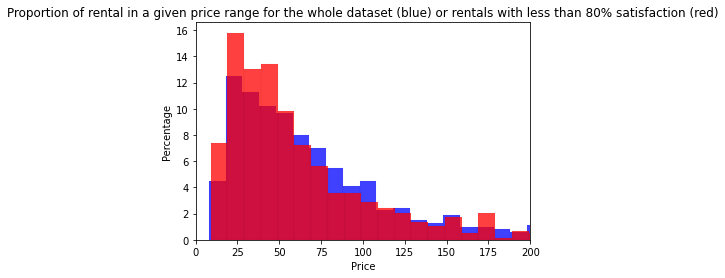

In [11]:
plot = sns.histplot(accommodations.price, color='blue', stat='percent', binwidth=10)
plot = sns.histplot(bad_rental.price, color='red', stat='percent',binwidth=10)
plot.set_xlim((0, 200))
plot.set_title('Proportion of rental in a given price range for the whole dataset (blue) or rentals with less than 80% satisfaction (red)')
plot.set_ylabel('Percentage')
plot.set_xlabel('Price');

# Favor superhost visibility

Superhost are associated with much larger rating as such enhancing their visibility should increase the average rating

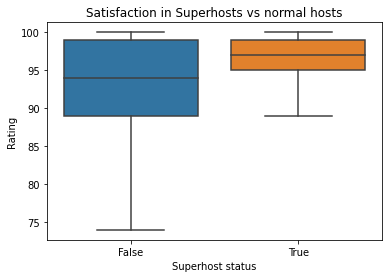

In [14]:
plot = sns.boxplot(data=accommodations, x='host_is_superhost',  y='review_scores_rating', showfliers=False)
plot.set_title('Satisfaction in Superhosts vs normal hosts')
plot.set_xlabel('Superhost status')
plot.set_ylabel('Rating');